In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/ozturkfemre/unsupervisedlearning/main/dataset/wdbc.data"
colnames = ["ID", "Diagnosis", "radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave.points", "symmetry", "fractal.dimension"]
df = pd.read_csv(url, header=None, usecols=[0,1,2,3,4,5,6,7,8,9,10,11])
df.columns = colnames

## Exploring the data

In [2]:
df1 = df.copy()
df = df.drop(["ID", "Diagnosis"], axis = 1)


In [3]:
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [4]:
df.isnull().sum()

radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
concave.points       0
symmetry             0
fractal.dimension    0
dtype: int64

In [5]:
# Normalizing the data 

from sklearn.preprocessing import MinMaxScaler
import pandas as pd


scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [6]:

df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816


##  Stats

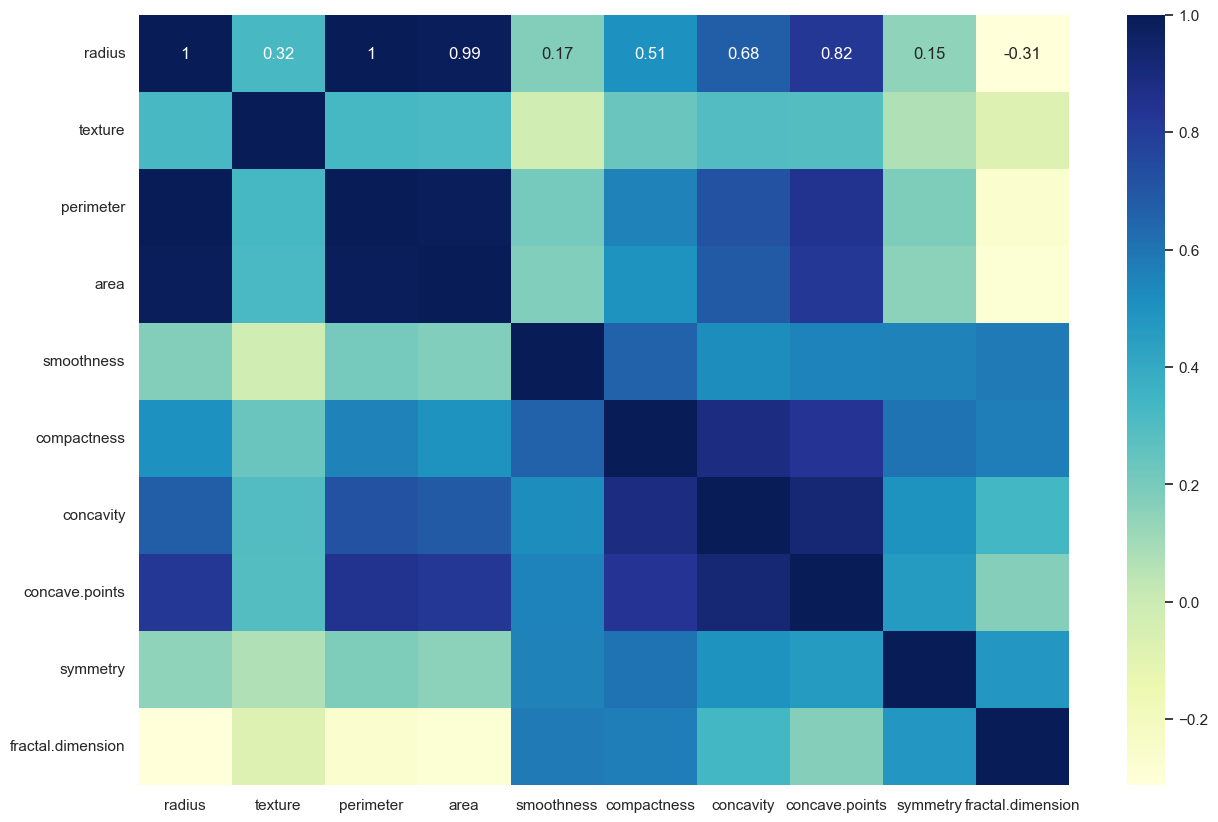

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

<Axes: ylabel='fractal.dimension'>

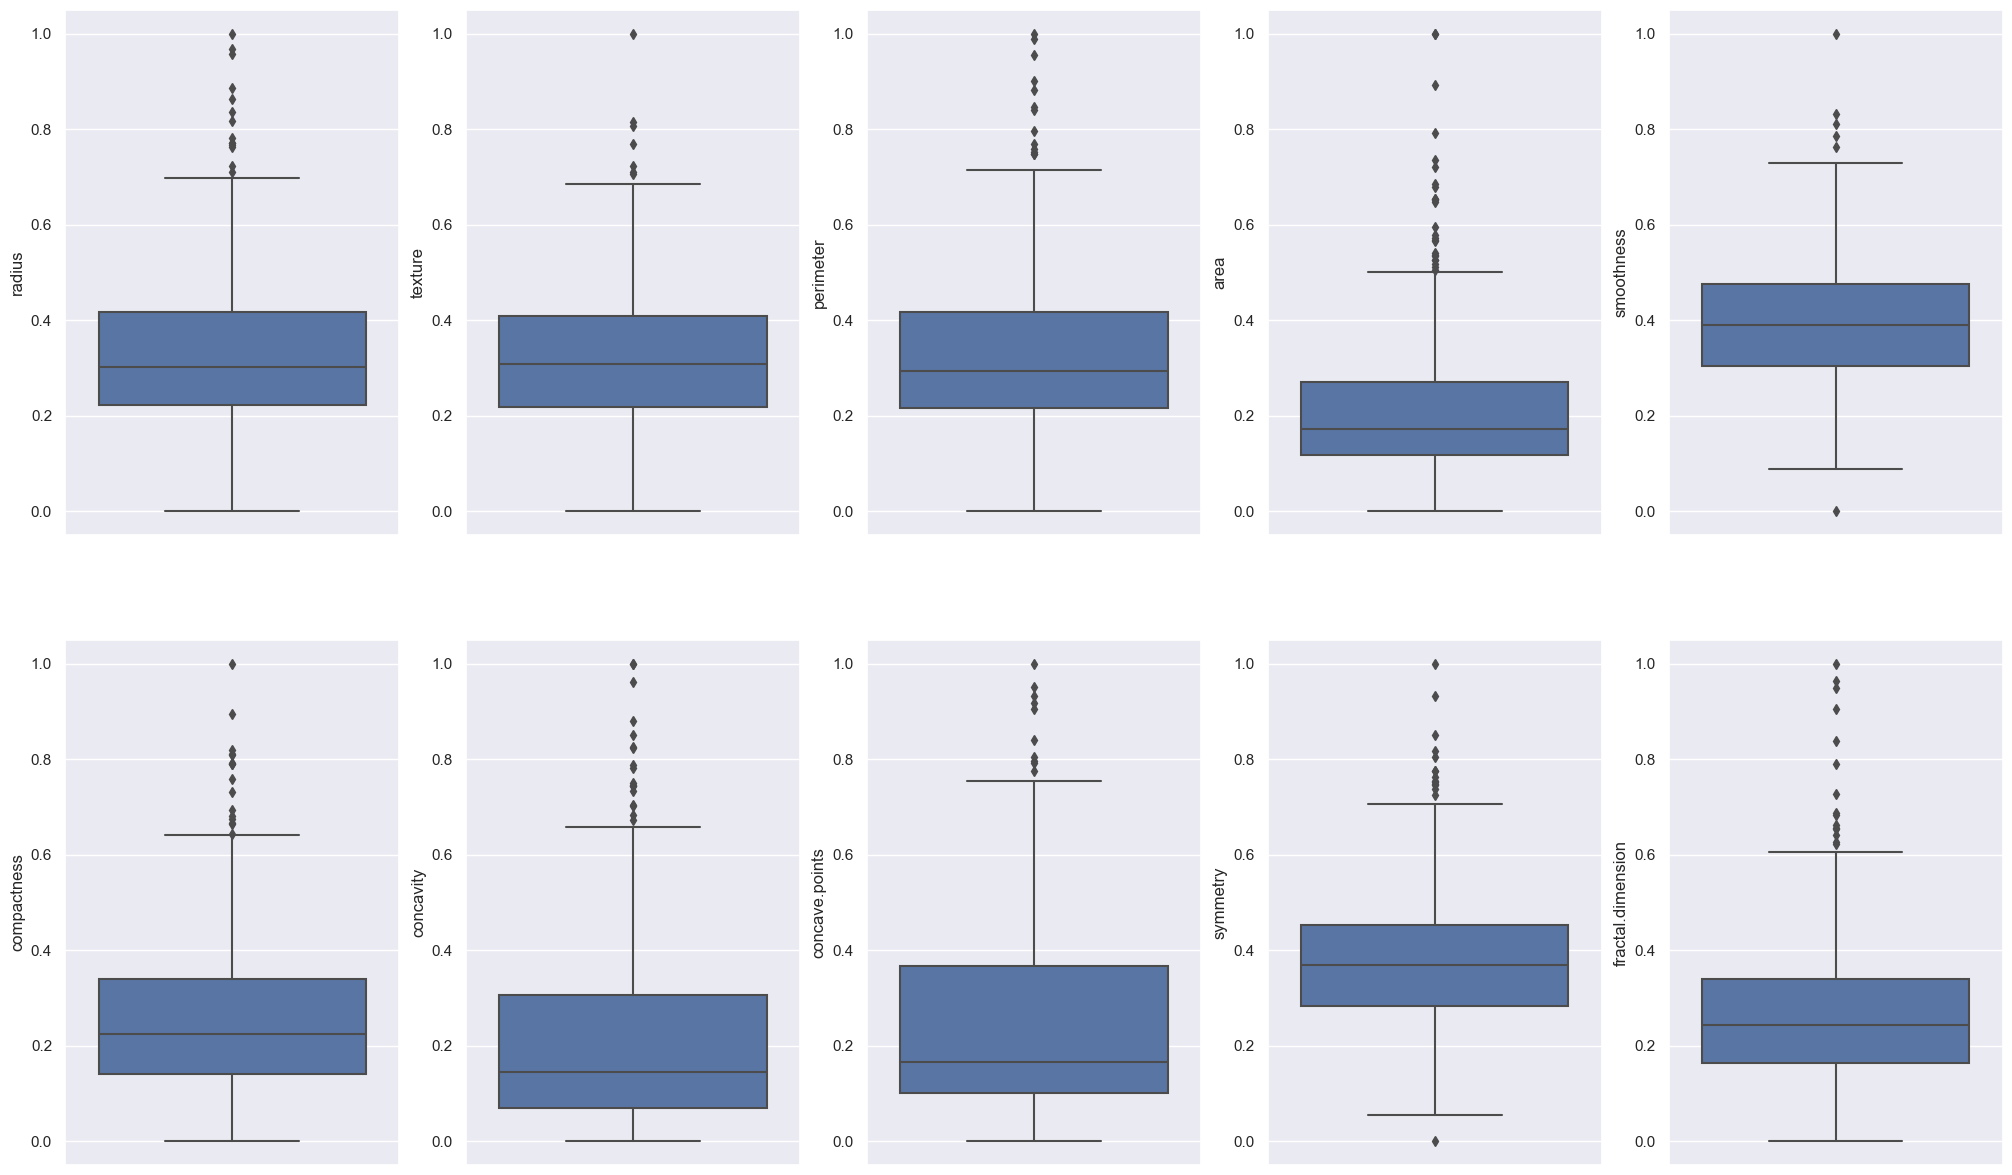

In [8]:
fig = plt.figure(figsize = (25,15))

fig.add_subplot(2, 5, 1)
sns.boxplot(y=df['radius'])

fig.add_subplot(2, 5, 2)
sns.boxplot(y=df['texture'])

fig.add_subplot(2, 5, 3)
sns.boxplot(y=df['perimeter'])

fig.add_subplot(2, 5, 4)
sns.boxplot(y=df['area'])

fig.add_subplot(2, 5, 5)
sns.boxplot(y=df['smoothness'])

fig.add_subplot(2, 5, 6)
sns.boxplot(y=df['compactness'])

fig.add_subplot(2, 5, 7)
sns.boxplot(y=df['concavity'])

fig.add_subplot(2, 5, 8)
sns.boxplot(y=df['concave.points'])

fig.add_subplot(2, 5, 9)
sns.boxplot(y=df['symmetry'])

fig.add_subplot(2, 5, 10)
sns.boxplot(y=df['fractal.dimension'])

<Axes: xlabel='Diagnosis', ylabel='fractal.dimension'>

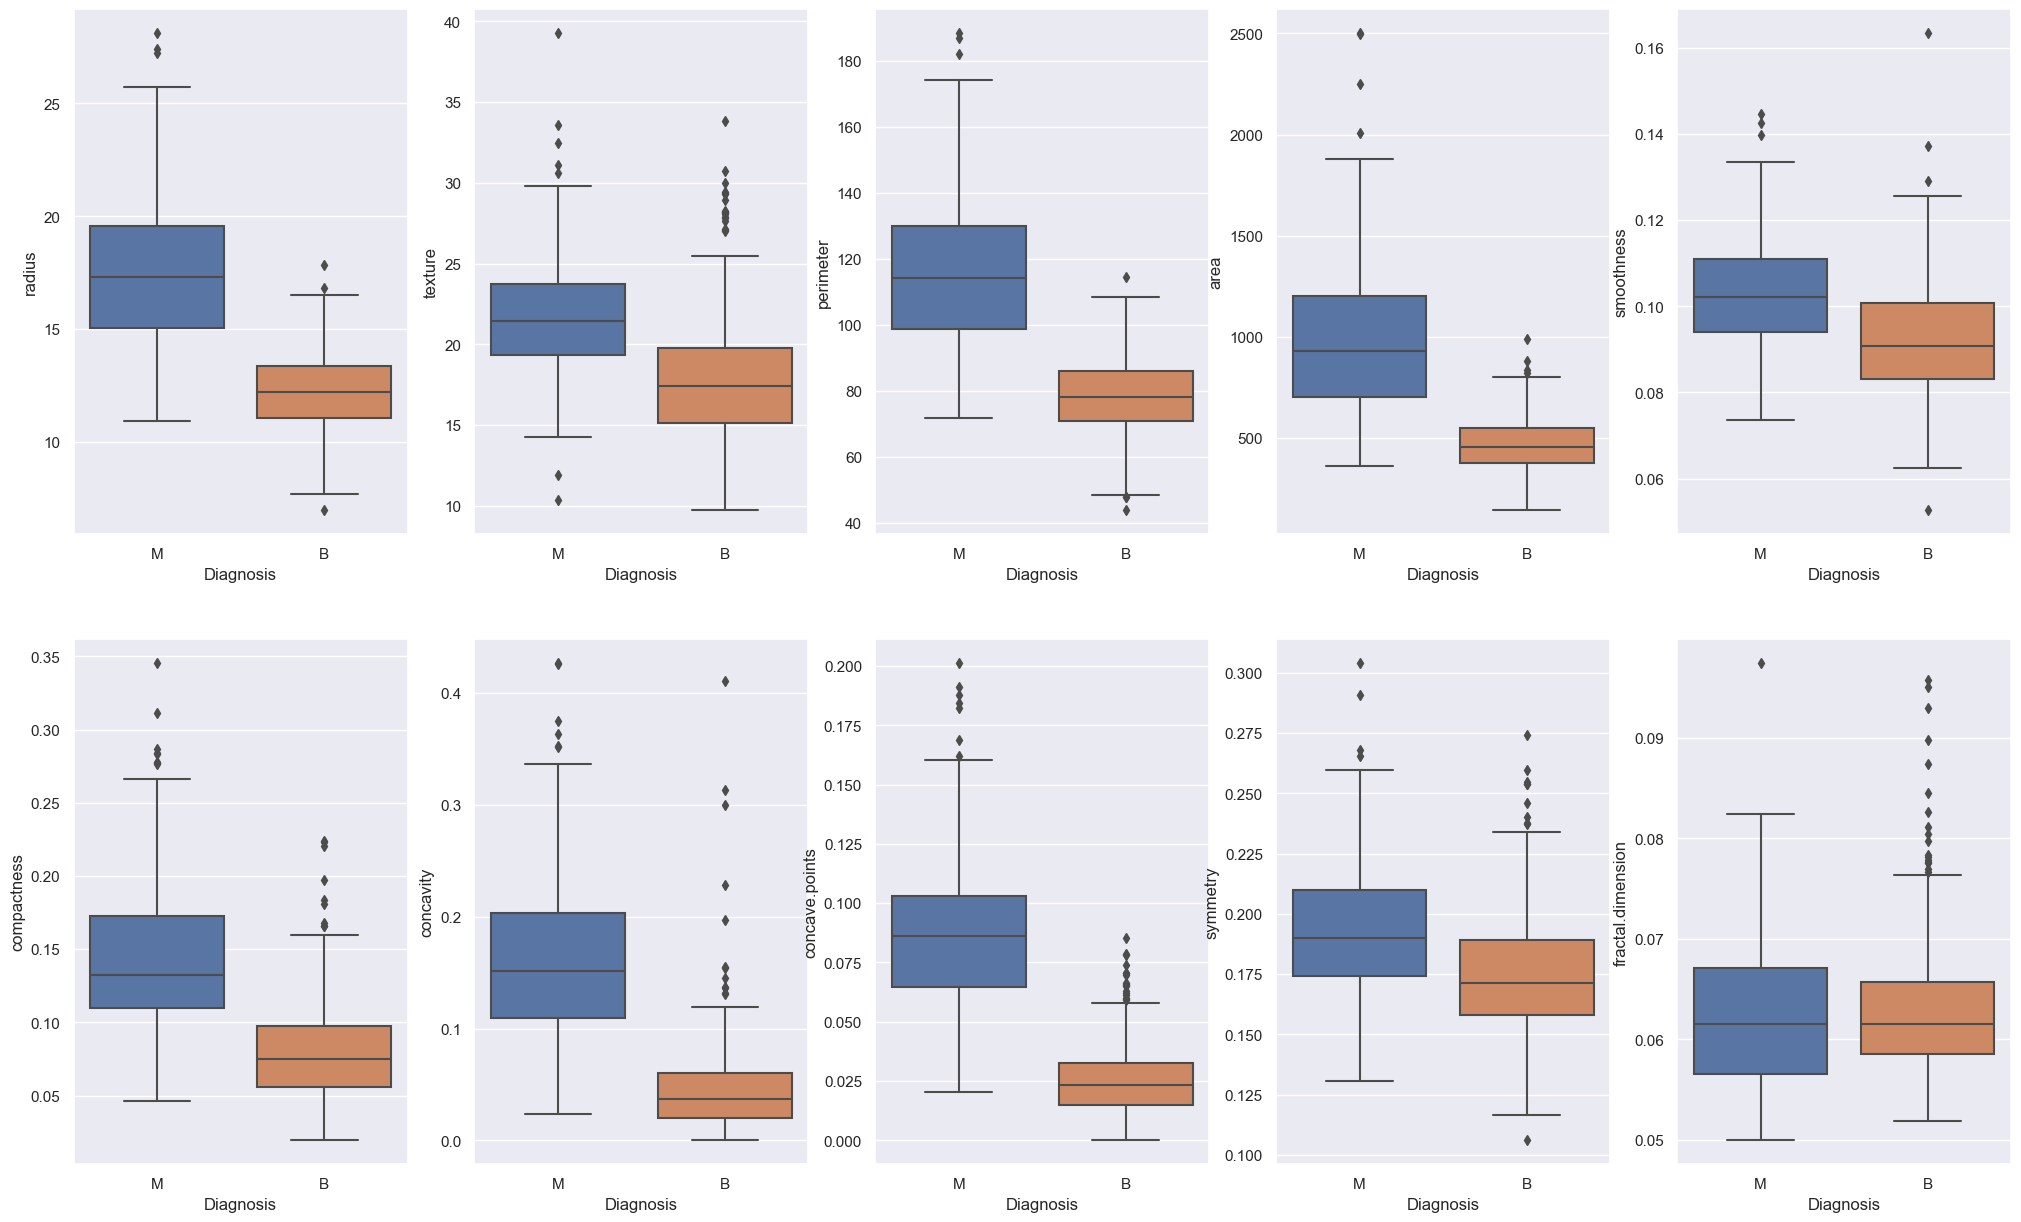

In [9]:
fig = plt.figure(figsize = (25,15))

fig.add_subplot(2, 5, 1)
sns.boxplot(y=df1['radius'], x=df1['Diagnosis'])

fig.add_subplot(2, 5, 2)
sns.boxplot(y=df1['texture'], x=df1['Diagnosis'])

fig.add_subplot(2, 5, 3)
sns.boxplot(y=df1['perimeter'], x=df1['Diagnosis'])

fig.add_subplot(2, 5, 4)
sns.boxplot(y=df1['area'], x=df1['Diagnosis'])

fig.add_subplot(2, 5, 5)
sns.boxplot(y=df1['smoothness'], x=df1['Diagnosis'])

fig.add_subplot(2, 5, 6)
sns.boxplot(y=df1['compactness'], x=df1['Diagnosis'])

fig.add_subplot(2, 5, 7)
sns.boxplot(y=df1['concavity'], x=df1['Diagnosis'])

fig.add_subplot(2, 5, 8)
sns.boxplot(y=df1['concave.points'], x=df1['Diagnosis'])

fig.add_subplot(2, 5, 9)
sns.boxplot(y=df1['symmetry'], x=df1['Diagnosis'])

fig.add_subplot(2, 5, 10)
sns.boxplot(y=df1['fractal.dimension'], x=df1['Diagnosis'])

## Doing PCA

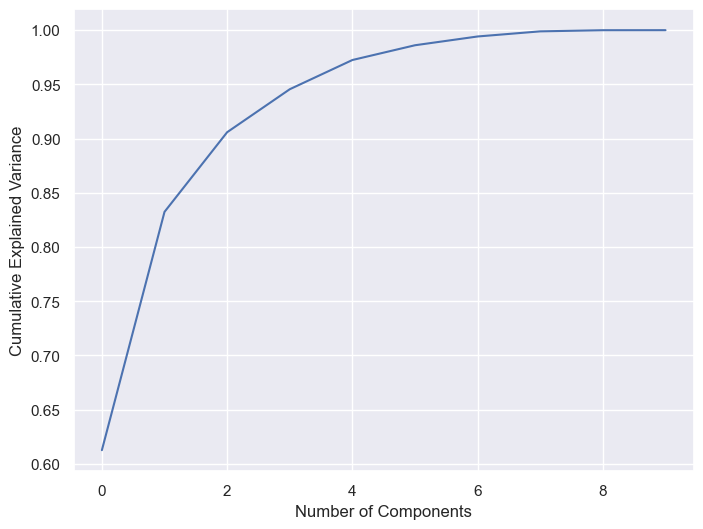

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca = PCA()
pca.fit(df)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)



plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [11]:
pca = PCA(n_components=2)
principalcomponents = pca.fit_transform(df)

pcadf = pd.DataFrame(data = principalcomponents, columns = ['PC1', 'PC2'])

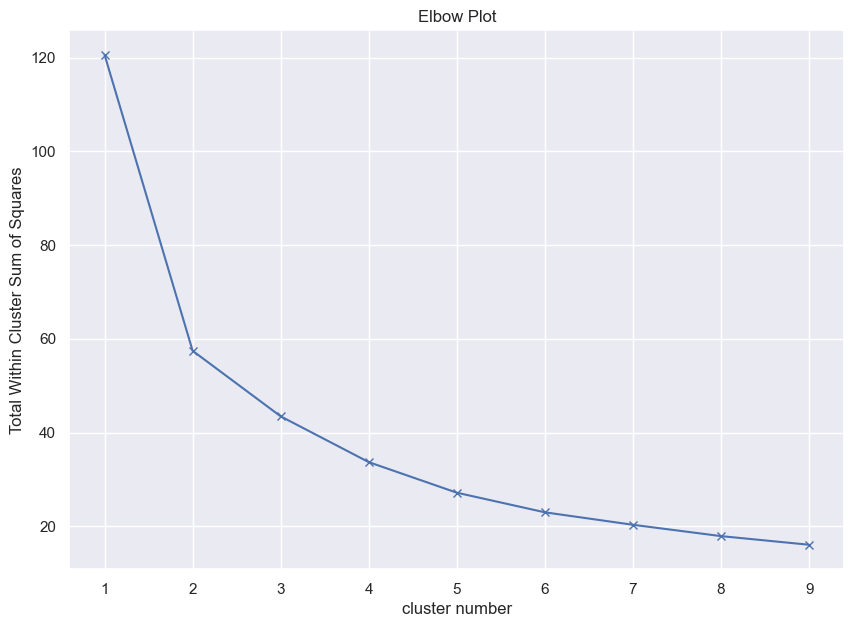

In [12]:
# from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters, n_init=25)
 kmeans.fit(pcadf)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(K,Sum_of_squared_distances, 'x-')
plt.xlabel('cluster number') 
plt.ylabel('Total Within Cluster Sum of Squares') 
plt.title('Elbow Plot')
plt.show()

## KNN with 2 clusters

In [13]:

kmeans2 = KMeans(n_clusters=2, random_state=0, n_init=25, algorithm='lloyd') 
kmeans2.fit(pcadf)


zero = []
one = []
for i in kmeans2.labels_:
    if i == 0:
        zero.append(i)
    else:
        one.append(i)

print("Cluster 0 :", len(zero))
print("Cluster 1 :", len(one))

Cluster 0 : 401
Cluster 1 : 168


<Figure size 1500x1000 with 0 Axes>

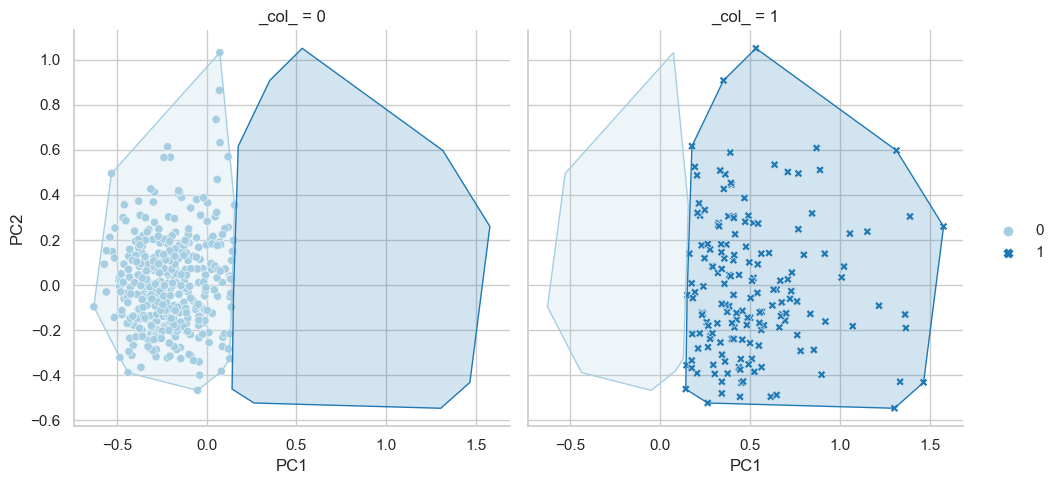

In [14]:
from scipy.spatial import ConvexHull
from matplotlib.colors import to_rgba
sns.set_style("whitegrid")
data = pcadf
xcol = "PC1"
ycol = "PC2"
hues = [0,1]
colors = sns.color_palette("Paired", len(hues))
palette = {hue_val: color for hue_val, color in zip(hues, colors)}
plt.figure(figsize=(15,10))
g = sns.relplot(data=pcadf, x=xcol, y=ycol, hue=kmeans2.labels_, style=kmeans2.labels_, col=kmeans2.labels_, palette=palette, kind="scatter")
def overlay_cv_hull_dataframe(x, y, color, data, hue):
    for hue_val, group in pcadf.groupby(hue):
        hue_color = palette[hue_val]
        points = group[[x, y]].values
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1],
                 facecolor=to_rgba(hue_color, 0.2),
                 edgecolor=hue_color)
g.map_dataframe(overlay_cv_hull_dataframe, x=xcol, y=ycol, hue=kmeans2.labels_)
g.set_axis_labels(xcol, ycol)

plt.show()

## KNN with 3 clusters

In [15]:
kmeans3 = KMeans(n_clusters=3, random_state=0, n_init=25, algorithm='lloyd') 
kmeans3.fit(pcadf)


zero = []
one = []
two = []
for i in kmeans3.labels_:
    if i == 0:
        zero.append(i)
    elif i == 1:
        one.append(i)
    else:
        two.append(i)

print("Cluster 0 :", len(zero))
print("Cluster 1 :", len(one))
print("Cluster 2 :", len(two))

Cluster 0 : 105
Cluster 1 : 348
Cluster 2 : 116


<Figure size 1500x1000 with 0 Axes>

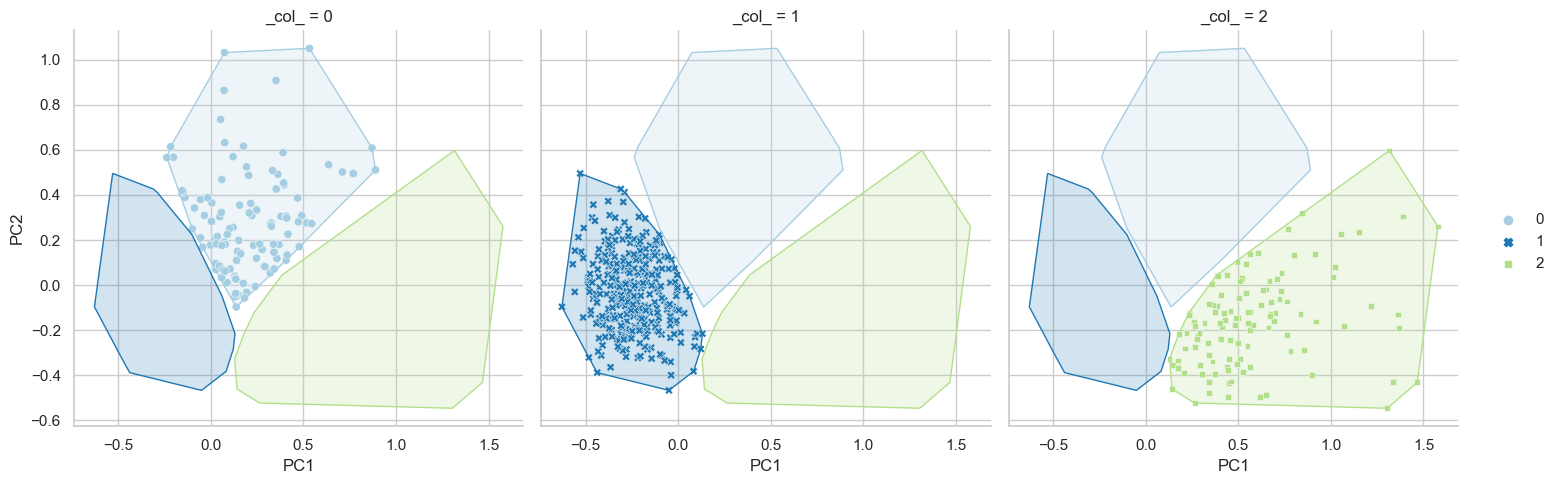

In [16]:
sns.set_style("whitegrid")
data = pcadf
xcol = "PC1"
ycol = "PC2"
hues = [0,1,2]
colors = sns.color_palette("Paired", len(hues))
palette = {hue_val: color for hue_val, color in zip(hues, colors)}
plt.figure(figsize=(15,10))
g = sns.relplot(data=pcadf, x=xcol, y=ycol, hue=kmeans3.labels_, style=kmeans3.labels_, col=kmeans3.labels_, palette=palette, kind="scatter")
def overlay_cv_hull_dataframe(x, y, color, data, hue):
    for hue_val, group in pcadf.groupby(hue):
        hue_color = palette[hue_val]
        points = group[[x, y]].values
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1],
                 facecolor=to_rgba(hue_color, 0.2),
                 edgecolor=hue_color)
g.map_dataframe(overlay_cv_hull_dataframe, x=xcol, y=ycol, hue=kmeans3.labels_)
g.set_axis_labels(xcol, ycol)

plt.show()

## Saving the labels to dataset

In [17]:
df['Cluster'] = kmeans3.labels_

In [18]:
df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension,Cluster
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,2
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,2
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,2
